FileNotFoundError: [Errno 2] No such file or directory: '/Users/xiulinyang/Desktop/TODO/multilingual-tokenization/perplexity_results_ppl/AR_200/AR_200_seed41.csv'

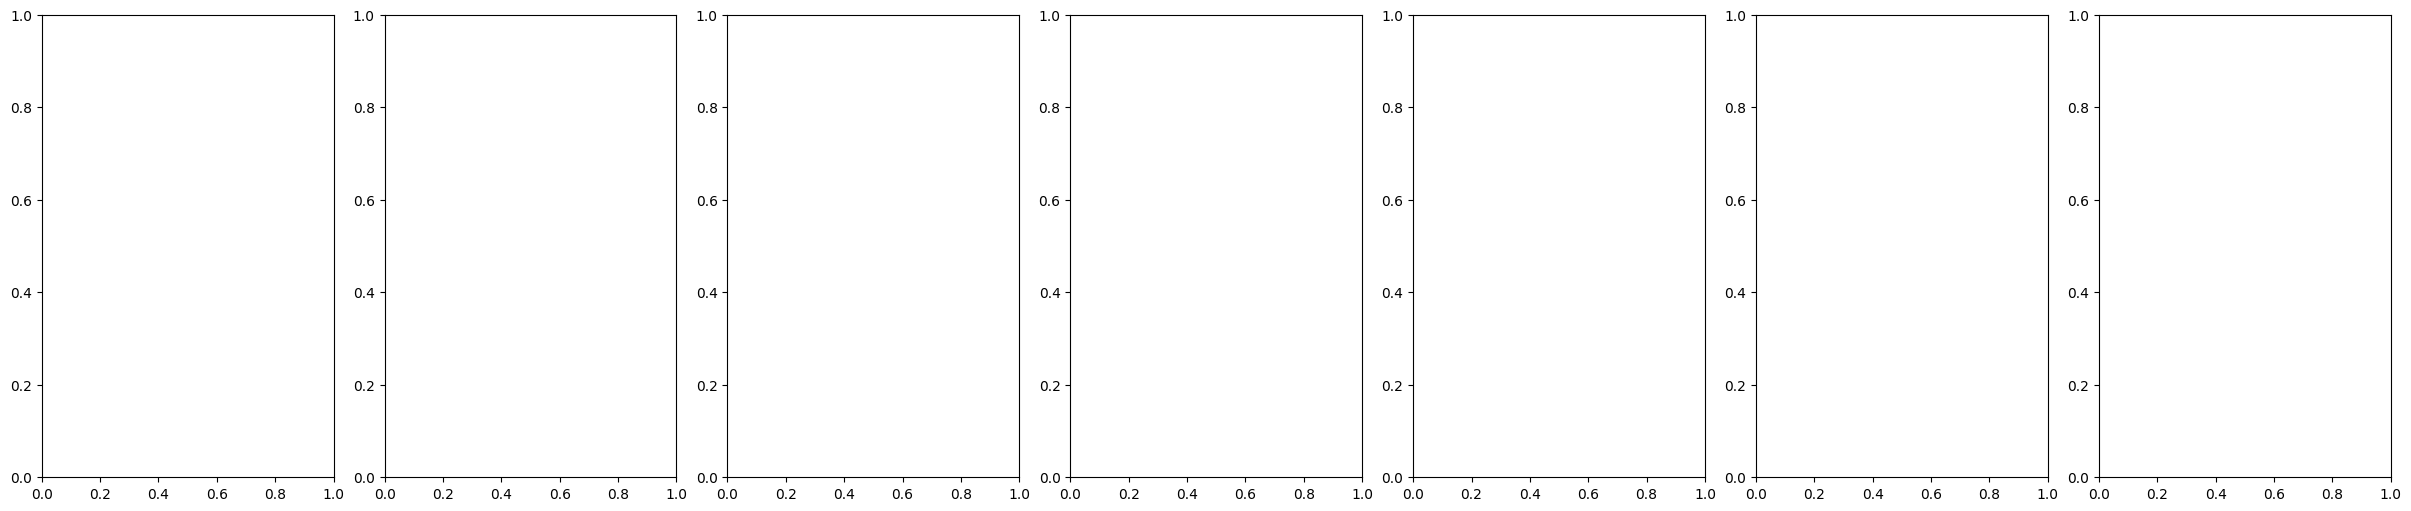

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
metric_type = 'ppl'
SEEDS = [41]
CHECKPOINTS = list(range(1, 11))
lang_info = [
    
    [  
        ("AR", "o", "-", "200",metric_type),
        ("TR", "o", "-", "200",metric_type),
        # ("RU", "o", "-", "200",metric_type),
        ("DE", "o", "-", "200",metric_type),
        ("EN", "o", "-", "200",metric_type),
    ],
    
    [  
        ("AR", "o", "-", "5000",metric_type),
        ("TR", "o", "-", "5000",metric_type),
        ("RU", "o", "-", "5000",metric_type),
        ("DE", "o", "-", "5000",metric_type),
        ("EN", "o", "-", "5000",metric_type),
    ],
    [  
        ("AR", "o", "-", "10000",metric_type),
        ("TR", "o", "-", "10000",metric_type),
        ("RU", "o", "-", "10000",metric_type),
        ("DE", "o", "-", "10000",metric_type),
        ("EN", "o", "-", "10000",metric_type),
    ],
    [
        ("AR", "o", "-", "20000",metric_type),
        ("RU", "o", "-", "20000",metric_type),
        ("TR", "o", "-", "20000",metric_type),
        ("DE", "o", "-", "20000",metric_type),
        ("EN", "o", "-", "20000",metric_type),
    ],
    [
        ("AR", "o", "-", "30000",metric_type),
        ("TR", "o", "-", "30000",metric_type),
        ("RU", "o", "-", "30000",metric_type),
        ("DE", "o", "-", "30000",metric_type),
        ("EN", "o", "-", "30000",metric_type),
    ],
    [
        ("AR", "o", "-", "50000",metric_type),
        ("TR", "o", "-", "50000",metric_type),
        ("RU", "o", "-", "50000",metric_type),
        ("DE", "o", "-", "50000",metric_type),
        ("EN", "o", "-", "50000",metric_type),
    ],
    
    [
        ("AR", "o", "-", "8680",metric_type),
        ("TR", "o", "-", "13222",metric_type),
        ("RU", "o", "-", "21042",metric_type),
        ("DE", "o", "-", "42180",metric_type),
        ("EN", "o", "-", "50000",metric_type),
    ],
]

COLOR = {
    "AR": "#ffa200",
    "TR": "#8e44ad",
    "DE": "#2980b9",
   "EN": "#27ae60",
     "RU": "#e67e22",
}
title = ['0.2K', '5K','10K','20K','30K','50K', 'SAME_VOCAB'] 


def plot_mean_perplexities(ax, file_info, checkpoints, seeds):
    results_path = '/Users/xiulinyang/Desktop/TODO/multilingual-tokenization/perplexity_results_{}/{}_{}/{}_{}_seed{}.csv'
    
    for file_data in file_info:
        lang, marker, linestyle, vocab_size, metric_type = file_data
        all_seeds_gmeans = []
        for seed in seeds:
            df = pd.read_csv(results_path.format(metric_type,lang, vocab_size,lang, vocab_size,seed))
            gmeans = []
            valid_checkpoints = []

            for ckpt in checkpoints:
               col_names = [col for col in df.columns if f"Epoch: {ckpt}" in col]
               if col_names:
                   col_name = col_names[0]
                   gmeans.append(stats.gmean(df[col_name]))
                   valid_checkpoints.append(ckpt)

            all_seeds_gmeans.append(gmeans)
            # gmeans = [stats.gmean(df[f"Perplexities (ckpt {ckpt})"]) for ckpt in checkpoints]
            # all_seeds_gmeans.append(gmeans)

        all_seeds_gmeans = np.array(all_seeds_gmeans)
        means = np.mean(all_seeds_gmeans, axis=0)

        if len(seeds) > 1:
            sems = stats.sem(all_seeds_gmeans, axis=0)
            ci = 1.96 * sems
        else:
            ci = None

       
        colorp = COLOR[lang]
        legend_name = lang+vocab_size
        if ci is not None:
            ax.errorbar(valid_checkpoints, means, yerr=ci, marker=marker, markersize=4, linewidth=0.8,
                        color=colorp, linestyle=linestyle, label=legend_name)
        else:
            ax.plot(valid_checkpoints, means, marker=marker, markersize=4, linewidth=0.8,
                    color=colorp, linestyle=linestyle, label=legend_name)
        ax.grid(True, color="lightgray")

def plot_perplexities_grid(file_infos_list, titles, checkpoints, seeds, colors, output_name):
    import numpy as np
    import matplotlib.pyplot as plt

    n = len(file_infos_list)
    fig, axes = plt.subplots(1, n, figsize=(24, 5), constrained_layout=True, sharex=True)
    axes = np.atleast_1d(axes)  # Handle single subplot case

    y_mins, y_maxs = [], []

    # First loop: plot and collect y-axis limits
    for i, (file_infos, title) in enumerate(zip(file_infos_list, titles)):
        ax = axes[i]
        plot_mean_perplexities(ax, file_infos, checkpoints, seeds)
        ax.set_title(title, fontsize=18)
        ax.grid(True, color="lightgray")
        ax.tick_params(axis='both', labelsize=12)
        ax.legend(fontsize=12)
        # Store y-limits
        y_min, y_max = ax.get_ylim()
        y_mins.append(y_min)
        y_maxs.append(y_max)

    # # Determine global y-axis limits
    # global_ymin = min(y_mins)
    # global_ymax = max(y_maxs)
    # 
    # for ax in axes:
    #     ax.set_ylim(global_ymin, global_ymax)

    # Set common labels
    fig.supxlabel("Epoch", size=18)
    fig.supylabel(f"{metric_type}", size=18)
    plt.savefig(output_name, bbox_inches='tight')
    plt.show()

plot_perplexities_grid(lang_info, title, CHECKPOINTS, SEEDS, COLOR, f'vocab_size_plot_{metric_type}.png')

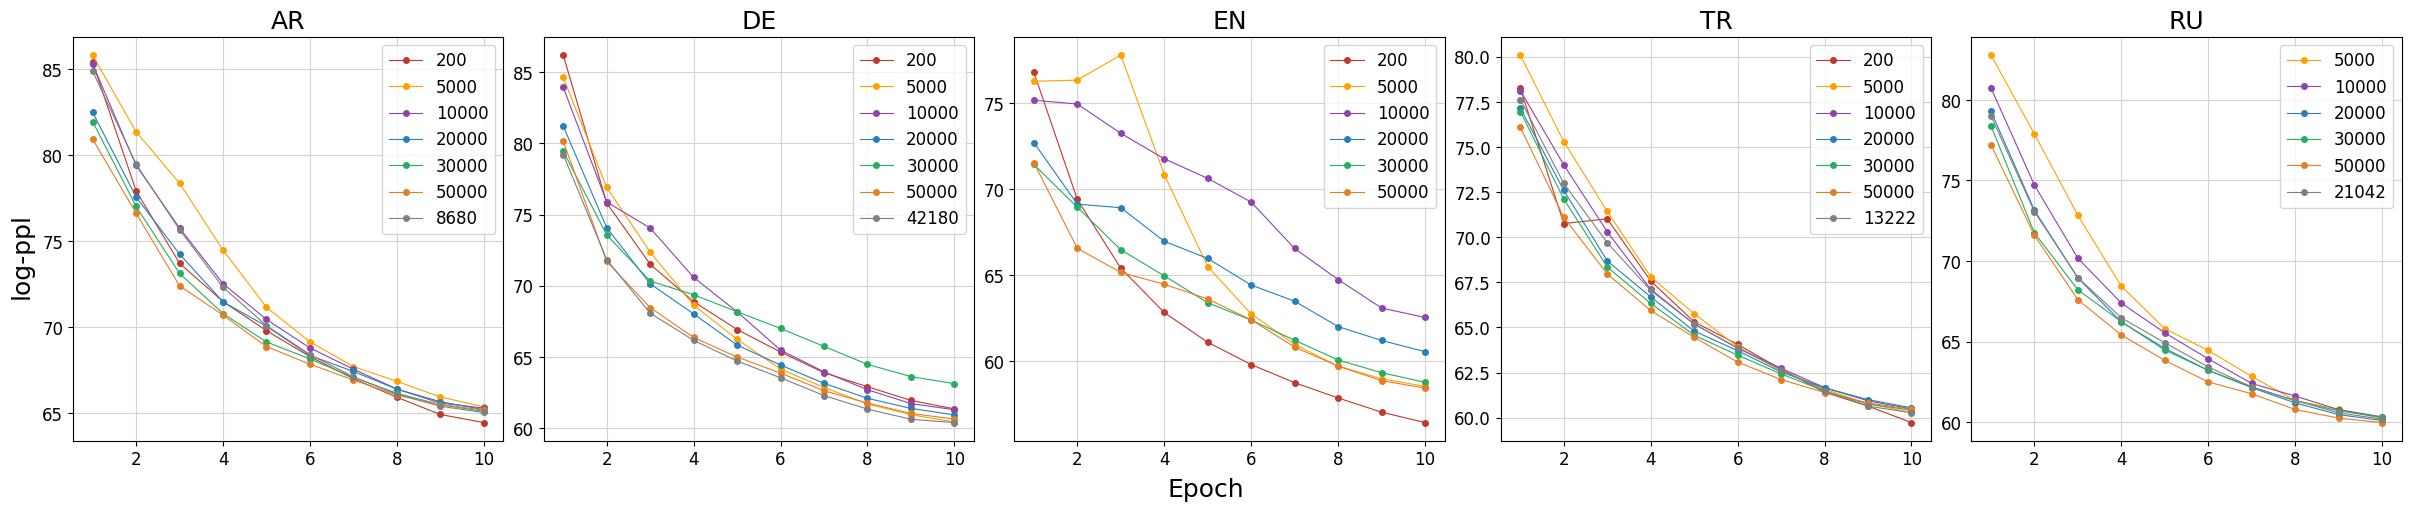

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
# metric_type = 'bpb'
SEEDS = [41]
CHECKPOINTS = list(range(1, 11))
lang_info = [
    # Arabic
    [   
        ("AR", "o", "-", "200", metric_type),
        ("AR", "o", "-", "5000", metric_type),
        ("AR", "o", "-", "10000", metric_type),
        ("AR", "o", "-", "20000", metric_type),
        ("AR", "o", "-", "30000", metric_type),
        ("AR", "o", "-", "50000", metric_type),
        ("AR", "o", "-", "8680", metric_type),
    ],
    # German
    [ 
        ("DE", "o", "-", "200", metric_type),
        ("DE", "o", "-", "5000", metric_type),
        ("DE", "o", "-", "10000", metric_type),
        ("DE", "o", "-", "20000", metric_type),
        ("DE", "o", "-", "30000", metric_type),
        ("DE", "o", "-", "50000", metric_type),
        ("DE", "o", "-", "42180", metric_type),
    ],
    # English
    [
        ("EN", "o", "-", "200", metric_type),
        ("EN", "o", "-", "5000", metric_type),
        ("EN", "o", "-", "10000", metric_type),
        ("EN", "o", "-", "20000", metric_type),
        ("EN", "o", "-", "30000", metric_type),
        ("EN", "o", "-", "50000", metric_type),
    ],
       # Turkish
    [
        ("TR", "o", "-", "200", metric_type),
        ("TR", "o", "-", "5000", metric_type),
        ("TR", "o", "-", "10000", metric_type),
        ("TR", "o", "-", "20000", metric_type),
        ("TR", "o", "-", "30000", metric_type),
        ("TR", "o", "-", "50000", metric_type),
        ("TR", "o", "-", "13222", metric_type),
    ],
    # Russian
    [
        ("RU", "o", "-", "5000", metric_type),
        ("RU", "o", "-", "10000", metric_type),
        ("RU", "o", "-", "20000", metric_type),
        ("RU", "o", "-", "30000", metric_type),
        ("RU", "o", "-", "50000", metric_type),
        ("RU", "o", "-", "21042", metric_type),
    ],
]

COLOR = {
    "200":"#c0392b",
    "5000": "#ffa200",
    "10000": "#8e44ad",
    "20000": "#2980b9",
    "30000": "#27ae60",
     "50000": "#e67e22",
}
title = ['AR','DE','EN','TR','RU'] 


def plot_mean_perplexities(ax, file_info, checkpoints, seeds):
    results_path = '/Users/xiulinyang/Desktop/TODO/multilingual-tokenization/perplexity_results_{}/{}_{}/{}_{}_seed{}.csv'
    
    for file_data in file_info:
        lang, marker, linestyle, vocab_size, metric_type = file_data
        all_seeds_gmeans = []
        for seed in seeds:
            df = pd.read_csv(results_path.format(metric_type, lang, vocab_size,lang, vocab_size,seed))
            gmeans = []
            valid_checkpoints = []

            for ckpt in checkpoints:
               col_names = [col for col in df.columns if f"Epoch: {ckpt}" in col]
               if col_names:
                   col_name = col_names[0]
                   gmeans.append(stats.gmean(df[col_name]))
                   valid_checkpoints.append(ckpt)

            all_seeds_gmeans.append(gmeans)
            # gmeans = [stats.gmean(df[f"Perplexities (ckpt {ckpt})"]) for ckpt in checkpoints]
            # all_seeds_gmeans.append(gmeans)

        all_seeds_gmeans = np.array(all_seeds_gmeans)
        means = np.mean(all_seeds_gmeans, axis=0)

        if len(seeds) > 1:
            sems = stats.sem(all_seeds_gmeans, axis=0)
            ci = 1.96 * sems
        else:
            ci = None
        if vocab_size in COLOR:
            colorp = COLOR[vocab_size]
        else:
           colorp = '#808080'
        legend_name = vocab_size
        if ci is not None:
            ax.errorbar(valid_checkpoints, means, yerr=ci, marker=marker, markersize=4, linewidth=0.8,
                        color=colorp, linestyle=linestyle, label=legend_name)
        else:
            ax.plot(valid_checkpoints, means, marker=marker, markersize=4, linewidth=0.8,
                    color=colorp, linestyle=linestyle, label=legend_name)
        ax.grid(True, color="lightgray")

def plot_perplexities_grid(file_infos_list, titles, checkpoints, seeds, colors, output_name):
    import numpy as np
    import matplotlib.pyplot as plt

    n = len(file_infos_list)
    fig, axes = plt.subplots(1, n, figsize=(24, 5), constrained_layout=True, sharex=True)
    axes = np.atleast_1d(axes)  # Handle single subplot case

    y_mins, y_maxs = [], []

    # First loop: plot and collect y-axis limits
    for i, (file_infos, title) in enumerate(zip(file_infos_list, titles)):
        ax = axes[i]
        plot_mean_perplexities(ax, file_infos, checkpoints, seeds)
        ax.set_title(title, fontsize=18)
        ax.grid(True, color="lightgray")
        ax.tick_params(axis='both', labelsize=12)
        ax.legend(fontsize=12)
        # Store y-limits
        y_min, y_max = ax.get_ylim()
        y_mins.append(y_min)
        y_maxs.append(y_max)

    # # Determine global y-axis limits
    # global_ymin = min(y_mins)
    # global_ymax = max(y_maxs)
    # 
    # for ax in axes:
    #     ax.set_ylim(global_ymin, global_ymax)

    # Set common labels
    fig.supxlabel("Epoch", size=18)
    fig.supylabel(f"{metric_type}", size=18)
    plt.savefig(output_name, bbox_inches='tight')
    plt.show()

plot_perplexities_grid(lang_info, title, CHECKPOINTS, SEEDS, COLOR, f'language_plot_{metric_type}.png')

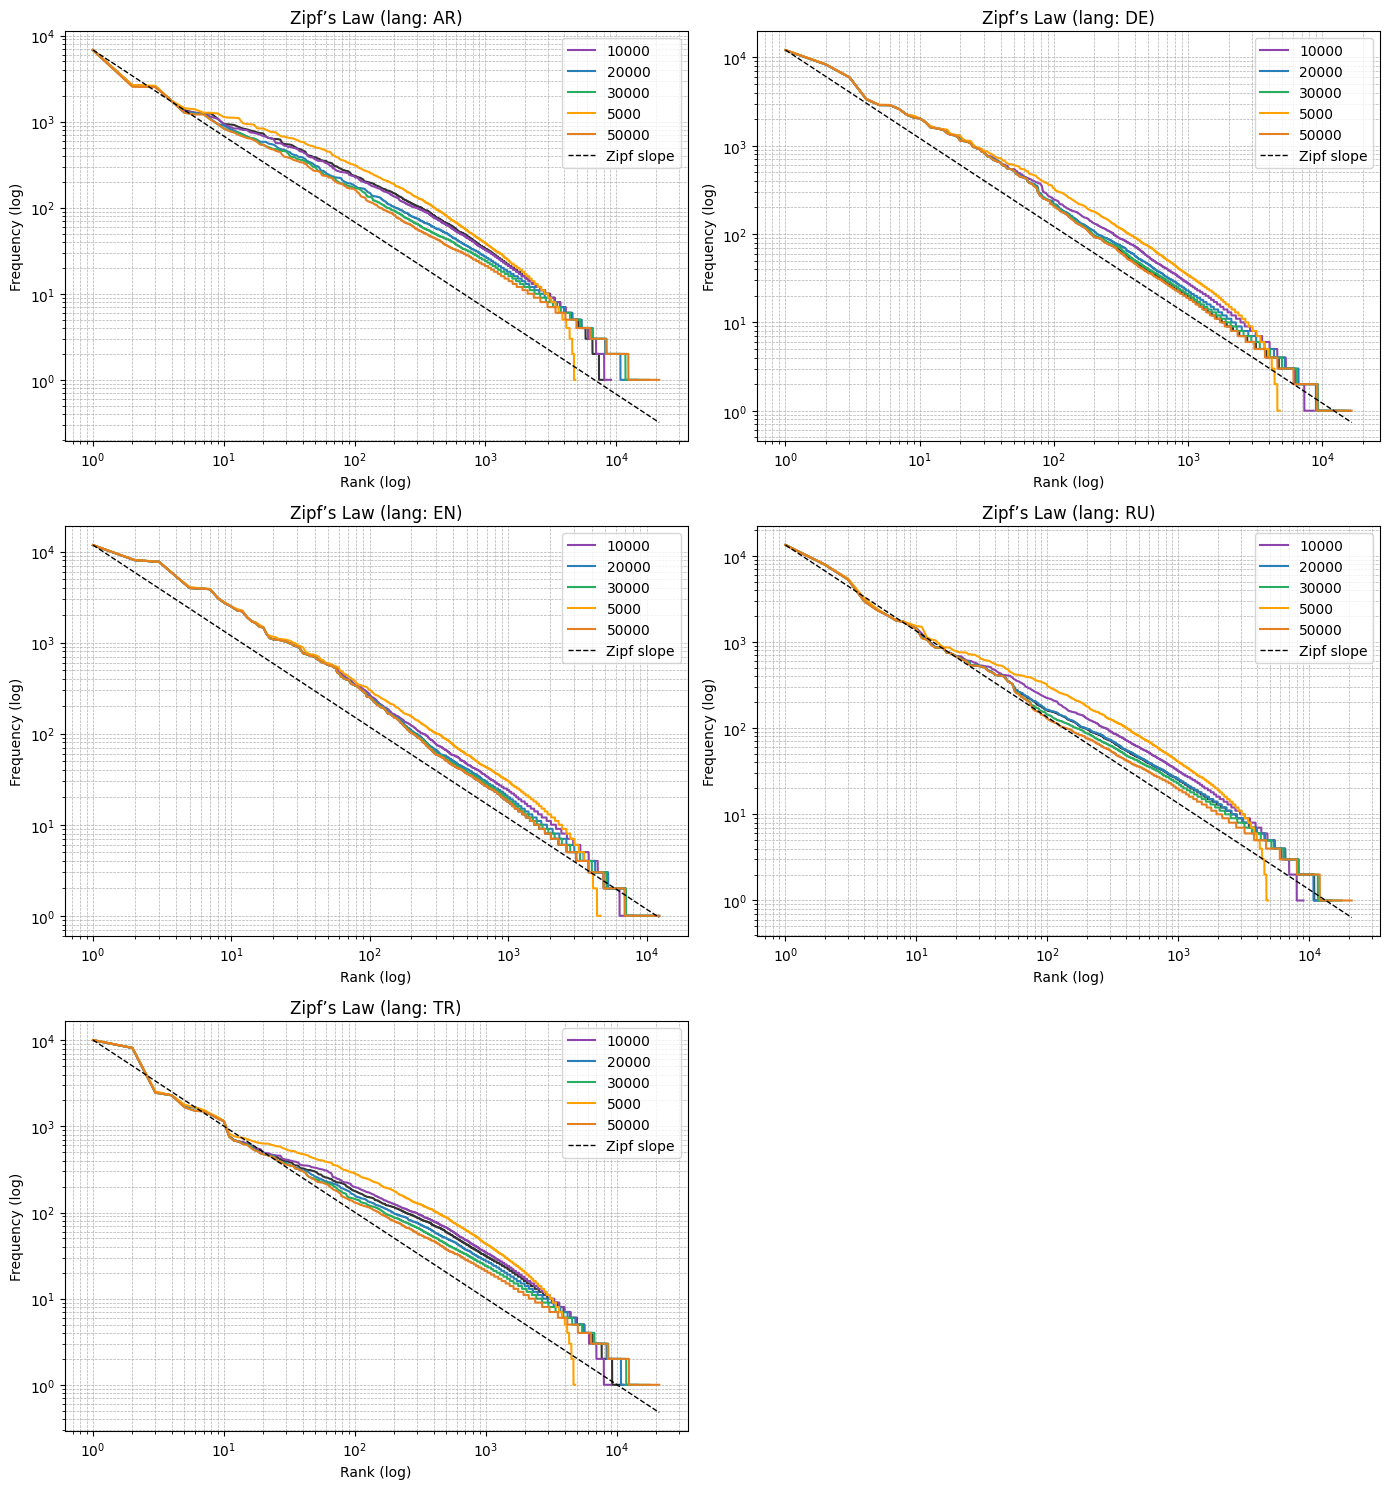

In [72]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict
import os
import re

COLOR = {
    "5000": "#ffa200",
    "10000": "#8e44ad",
    "20000": "#2980b9",
    "30000": "#27ae60",
    "50000": "#e67e22",
}

all_langs = glob.glob('freq_epoch/*.json')
grouped_by_suffix = defaultdict(list)
for path in all_langs:
    basename = os.path.splitext(os.path.basename(path))[0]
    match = re.match(r'^([A-Z]+)(.*)$', basename)
    if match:
        lang_prefix = match.group(1)  
        suffix      = match.group(2).split('_')[-1] 
        grouped_by_suffix[lang_prefix].append((suffix, path))

suffixes = sorted(grouped_by_suffix.keys(), key=lambda x: (len(x), x))
num_groups = len(suffixes)
cols = 2
rows = (num_groups + 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(14, rows*5), squeeze=False)

for idx, suffix in enumerate(suffixes):
    ax = axes[idx // cols][idx % cols]

    # collect the max freq over all languages in this group
    max_freq = 0

    # plot each language’s Zipf curve
    for lang_prefix, file_path in sorted(grouped_by_suffix[suffix]):
        with open(file_path, 'r', encoding='utf-8') as f:
            freq = Counter({k: int(v) for k, v in json.load(f).items()})
        counts = np.array(sorted(freq.values(), reverse=True))
        ranks  = np.arange(1, len(counts) + 1)

        max_freq = max(max_freq, counts.max())

        color = COLOR.get(lang_prefix, '#333333')
        label = f"{lang_prefix}".upper()
        ax.plot(ranks, counts,
                linestyle='-',
                color=color,
                label=label)

    # now overlay the Zipf slope = –1 reference
    y_ref = max_freq / ranks  # <--- easiest

    ax.plot(
        ranks,
        y_ref,
        color='black',
        linestyle='--',
        linewidth=1.0,
        label="Zipf slope"
    )
   
    # axis styling
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f"Zipf’s Law (lang: {suffix or 'same compression rate'})")
    ax.set_xlabel("Rank (log)")
    ax.set_ylabel("Frequency (log)")
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend()

# delete empty subplots
for i in range(rows*cols):
    if i >= num_groups:
        fig.delaxes(axes[i//cols][i%cols])

plt.tight_layout()
plt.savefig('zipf_vocab_plot.png')
plt.show()